In [1]:
import torch

from transformers import FlaubertForSequenceClassification, FlaubertTokenizer

from src.dataset import FactsOrAnalysisDS_BERT
from src.models import FoaFlauBERTlinear
from src.train import trainIters

device = torch.device("cuda")
flaubert_seq = FlaubertForSequenceClassification.from_pretrained('flaubert-base-uncased',num_labels=1)
tokeniser = FlaubertTokenizer.from_pretrained('flaubert-base-uncased')


In [2]:
ds = "data/data.csv"
ds = FactsOrAnalysisDS_BERT(ds,tokeniser,n_read=2048*2)
tr = int(len(ds)*.70)
vd = int(len(ds)*.10)
ts = len(ds) - tr - vd
train_ds, valid_ds, test_ds = torch.utils.data.random_split(ds,[tr,vd,ts])

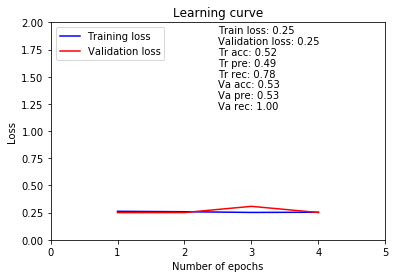

In [3]:
model=FoaFlauBERTlinear(flaubert_seq).to(device)

## CONFIG
batch_size=16
n_epochs=5
learning_rate=1e-4
weight_decay=0
clip=.2
## /CONFIG

t,v=trainIters(model,
               train_ds,
               valid_ds,
               batch_size,
               n_epochs,
               learning_rate,
               weight_decay,
               clip,
               device)